# Kotepreps_Reboot_1

* 총 5문

* 출처: 프로그래머스

* 난이도: 프로그래머스 분류 기준 lv. 1 ~ lv. 3

## Q1

**[체육복](https://school.programmers.co.kr/learn/challenges?order=recent&languages=python3&page=1&search=%EC%B2%B4%EC%9C%A1%EB%B3%B5)**

* Lv. 1(58%)

* Greedy Algorithm

### Greedy Algorithm

> "지금 당장 눈 앞에서 가장 좋아 보이는 선택"을 반복해서 global optimal에 도달하기.

1. 특징

* 매 순간의 local optimal이 전체에서도 최선(global optimal)이 되리라는 믿음

* DP는 모든 경우를 기억하며 최적해 탐색하는 반면 Greedy는 현재 상황만 보고 결정함

* 항상 맞지는 않지만, 조건이 성립하는 문제에서는 정답을 도출함

> e.g. 거스름돈 문제: 가장 큰 단위의 동전부터 채워나가면 optimal

2. 체육복

* 잃어버린 학생(idx)은 왼쪽(idx-1)부터 오른쪽(idx+1) 순으로 빌릴 수 있는지 확인.

* 일관된 순서로 탐색해야 함. 

> 지금같이 맨 앞에서부터 쭉 훑어보는 케이스일 때, **도둑맞은 idx번 학생**이 **여벌 옷이 있는 idx-1번 학생**의 체육복을 요청하지 않으면 idx-1번 학생은 **더 이상 누구한테도 체육복을 빌려줄 수 없음**. 하지만 다음 차례인 idx+1번 학생은 이후 자기 차례가 오면 여전히 다른 누군가에게 빌려줄 기회가 있음.

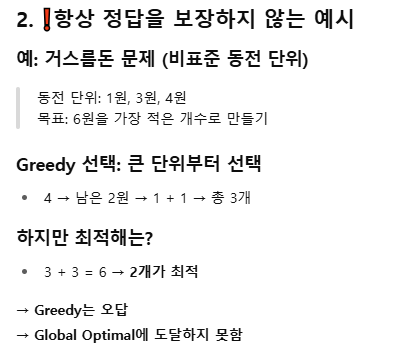

### ✅ Greedy Algorithm이 정답을 보장하는 2가지 조건


1. **Greedy Choice Property**: 매 순간의 지역 최적 선택이 전체 최적해의 일부임, 지금 선택해도 나중에 다시 바꾸지 않아도 됨. 현재의 선택은, 미래에 더 나은 선택을 하는 데 절대 방해하지 않음.

2. **Optimal Substructure**: 문제의 전체 최적해가 부분 최적해로 구성됨, 앞에서 구한 해를 버릴 필요가 없음


### 📌 예시 1: 거스름돈 문제 (표준 동전: 1, 5, 10, 50, 100, 500)

- **Greedy**: 가장 큰 단위부터 동전을 채워나감
- **결과**: Always Global Optimal

**Why Global Optimal??**
- 각 단위는 작은 단위의 배수 → **부분 최적이 전체 최적과 일치**
- Optimal Substructure 만족 → 이전 계산을 다시 고려할 필요 없음

### 📌 예시 2: 체육복 문제

- 각 학생은 인접한 앞/뒤 번호 학생에게만 체육복을 빌릴 수 있음
- 체육복은 1벌만 빌려줄 수 있음
- 탐색을 앞에서부터 진행하며 먼저 빌려주는 전략은  
  뒤에 오는 학생의 기회를 침해하지 않음

**→ 두 조건 모두 충족. Always Global Optimal**

### 지피티 풀이

In [ ]:
def solution(n, lost, reserve):
    # 1. 겹치는 사람 제거
    lost_set = set(lost) - set(reserve)
    reserve_set = set(reserve) - set(lost)

    # 2. Greedy하게 빌려주기
    for r in sorted(reserve_set):
        if r - 1 in lost_set:
            lost_set.remove(r - 1)
        elif r + 1 in lost_set:
            lost_set.remove(r + 1)

    # 3. 전체 학생 수에서 못 빌린 사람만 제외
    return n - len(lost_set)

## Q2

**[모의고사](https://school.programmers.co.kr/learn/challenges?order=recent&languages=python3&page=1&search=%EB%AA%A8%EC%9D%98)**

* Lv. 1(66%)

* Brute Force

In [3]:
i1 = [1, 2, 3, 4, 5]
i2 = [1, 3, 2, 4, 2]
o1 = [1]
o2 = [1, 2, 3]

### 내 풀이

In [ ]:
def solution(answers):

    user_1, user_2, user_3 = [], [], []
    list_for_user_2 = [1, 3, 4, 5]
    dict_for_user_3 = {0:3,1:1,2:2,3:4,4:5}

    # Brute Force
    cnt = 0
    while cnt < len(answers):
        # user_1
        user_1.append(cnt%5+1)
        
        # user_2
        if not cnt % 2:
            user_2.append(2)
        else:
            user_2.append(list_for_user_2.pop(0))
            list_for_user_2.append(user_2[-1])

        # user_3: 
        user_3.append(dict_for_user_3[(cnt//2)%5])
        for i in (user_1, user_2, user_3):
            if i[-1] != answers[cnt]:
                i.pop()
        cnt += 1  
        
        
    user_dict = {1:len(user_1), 2:len(user_2), 3:len(user_3)}
    answer = []
    for i in user_dict.keys():
        if user_dict[i] == max(user_dict.values()): 
            answer.append(i) 
    return answer

In [6]:
solution(i1)
solution(i2)

[1, 2, 3]

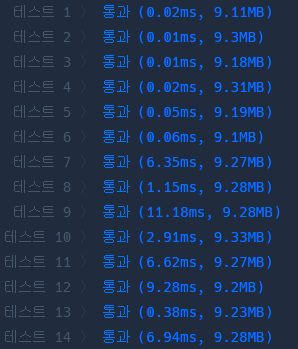

### 다른 사람 풀이

In [ ]:
def solution(answers):
    pattern1 = [1,2,3,4,5]
    pattern2 = [2,1,2,3,2,4,2,5]
    pattern3 = [3,3,1,1,2,2,4,4,5,5]
    score = [0, 0, 0]
    result = []

    for idx, answer in enumerate(answers):
        if answer == pattern1[idx%len(pattern1)]:
            score[0] += 1
        if answer == pattern2[idx%len(pattern2)]:
            score[1] += 1
        if answer == pattern3[idx%len(pattern3)]:
            score[2] += 1

    for idx, s in enumerate(score):
        if s == max(score):
            result.append(idx+1)

    return result

In [8]:
solution(i1)
solution(i2)

[1, 2, 3]

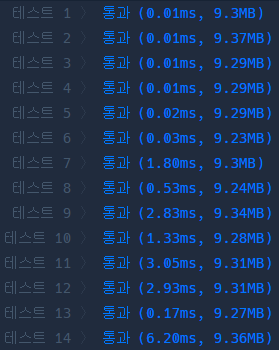

## Q3

**[타겟넘버](https://school.programmers.co.kr/learn/challenges?order=recent&languages=python3&page=1&search=%ED%83%80%EA%B2%9F%20%EB%84%98%EB%B2%84)**

* Lv. 2(63%)

* DFS/BFS

In [2]:
i1 =[1, 1, 1, 1, 1], 3
i2 = [4, 1, 2, 1], 4
o1 = 5
o2 = 2

### 내 풀이

In [16]:
def solution(numbers, target):
    array = [[None]*2**i for i in range(len(numbers)+1)]
    array[0][0] = 0 
    for i in range(0,len(array)-1):
        for n in range(len(array[i])):
            array[i+1][2*n] = array[i][n] + numbers[i]
            array[i+1][2*n+1] = array[i][n] - numbers[i]
    return array[-1].count(target)

이 방법은 출제자의 의도에서 아득히 벗어남.

Binary Tree

In [3]:
solution(i1[0], i1[1])
solution(i2[0], i2[1])

2

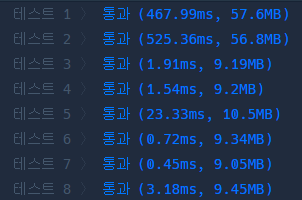

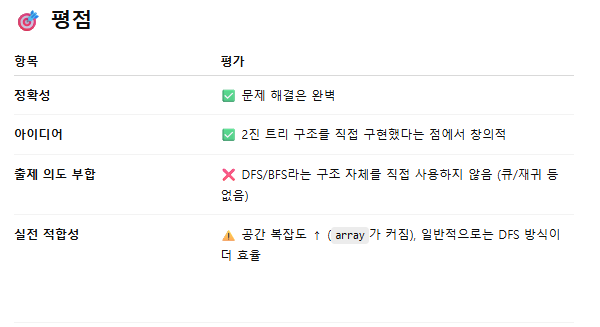

**그렇다면 출제 의도에 맞는 풀이는?** w/ gpt 4o

In [4]:
# DFS이자 Brute Force

def solution(numbers, target):
    result = 0

    def dfs(index, total):
        nonlocal result
        if index == len(numbers):
            if total == target:
                result += 1
            return
        dfs(index + 1, total + numbers[index]) # Recursive
        dfs(index + 1, total - numbers[index]) # Recursive

    dfs(0, 0)
    return result

In [6]:
solution(i1[0], i1[1])
solution(i2[0], i2[1])

2

## Q4

**[기능개발](https://school.programmers.co.kr/learn/challenges?order=recent&languages=python3&page=1&search=%EA%B8%B0%EB%8A%A5%EA%B0%9C%EB%B0%9C)**

* Lv. 2(66%)

* Stack/Queue

In [19]:
i1 = [93, 30, 55], [1, 30, 5]
i2 = [95, 90, 99, 99, 80, 99], [1, 1, 1, 1, 1, 1]
o1 = [2, 1]
o2 = [1, 3, 2]

### 내 풀이

In [ ]:
def solution(progresses, speeds):
    time_study = []
    for idx, val in enumerate(progresses):
        count = 0
        while val < 100:
            val += speeds[idx]
            count += 1
        time_study.append(count)

    # time_study에는 태스크별로 남은 일수만 계산

    queue = []   # 완성된 일들
    answer = []  # 출력값 저장장
    while sum(answer) < len(progresses):  

        for i in range(len(time_study)):
            if time_study[i]:       # 0이면 작업 안 하고 대기함
                time_study[i] -= 1  # 0 아니면 하루 분량 작업

        for i in range(-len(time_study), 0):   # pop 기능 쓸거라서 인덱스 마이너스로 셀 거임
            if time_study[i]:     # 0이 아니라면,
                if queue:         # queue에 뭐라도 들어 있으면,
                    answer.append(len(queue))
                    queue = []   # 배포하고 초기화
                break   # 배포는 하루에 한번밖에 못함. 다음 날이 되었습니다.
            queue.append(time_study.pop(i)) 
        if not time_study: # 더 이상 남은 작업이 없어요.
            answer.append(len(queue))
    return answer

In [23]:
solution(i1[0], i1[1])
solution(i2[0], i2[1])

[1, 3, 2]

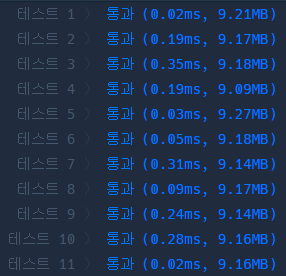

### 다른 사람 풀이

In [ ]:
def solution(progresses, speeds):
    Q=[]
    for p, s in zip(progresses, speeds):
        if len(Q)==0 or Q[-1][0]<-((p-100)//s):
            Q.append([-((p-100)//s),1])
        else:
            Q[-1][1]+=1
    return [q[1] for q in Q]

In [25]:
solution(i1[0], i1[1])
solution(i2[0], i2[1])

[1, 3, 2]

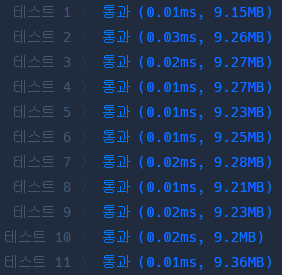

In [26]:
def solution(progresses, speeds):
    from math import ceil
    days = [ceil((100 - p) / s) for p, s in zip(progresses, speeds)]

    result = []
    current_max = days[0]
    count = 1

    for day in days[1:]:
        if day <= current_max:
            count += 1
        else:
            result.append(count)
            current_max = day
            count = 1

    result.append(count)
    return result

In [27]:
solution(i1[0], i1[1])
solution(i2[0], i2[1])

[1, 3, 2]

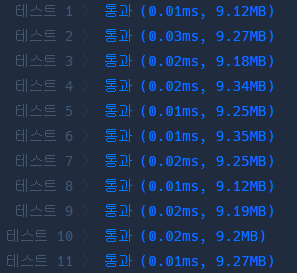

In [ ]:
# utilizing QUEUE

from collections import deque

def solution(progresses, speeds):
    days = deque()
    for p, s in zip(progresses, speeds):
        remain = (100 - p) // s + ((100 - p) % s > 0) # True = 1   # 기본은 잔량 // 업무속도인데. Remainder(나머지지) 있으면 1을 더하고, 나누어떨어졌다면 냅두기(Boolean Operation).
        days.append(remain)

    result = []
    while days:  # 모든 작업들을 days에서 다 빼낼 때까지 반복 수행
        current = days.popleft()   # 맨 첫번째 작업 빼내기
        count = 1
        while days and days[0] <= current:  # 그 다음 작업이 current보다 커지기 전까지 반복 수행
            days.popleft()
            count += 1
        result.append(count)
    return result

```python
# Queueing 시각화해보자
days = [1, 1, 20, 1] 
current = 10
count = 1

result = [1]
```

사실 deque() 안 쓰고, 왼쪽 꺼 빼내는 걸 `days.pop(0)`으로 수행해도 되는데, 

`list_data.pop(idx)`는 꺼낼 때마다 index 조회해야 되서, 데이터 사이즈 커지면 비효율적.

`list_data.pop(0)`: O(n)

`deque_data.popleft()`: O(1)

In [29]:
solution(i1[0], i1[1])
solution(i2[0], i2[1])

[1, 3, 2]

**핵심**

| 코드 부분            | 역할                                  |
|---------------------|---------------------------------------|
| `deque`             | 작업 순서 유지                        |
| `popleft()`         | Queue처럼 앞에서 하나씩 꺼냄         |
| `while days[0] <= current` | 한 번에 배포 가능한 항목 그룹핑     |

---

**정리**

| 요소                                         | 의미                                                   |
|--------------------------------------------|--------------------------------------------------------|
| “작업이 앞에서부터 차례로 배포되어야 한다” | Queue 특성                                             |
| 직접 Queue를 안 쓰고도 풀 수 있음         | 그래서 사람들이 혼란                                   |
| 하지만 문제 출제의도는 Queue 개념 익히기 | “왜 앞이 완료되어야 다음이 나가는가?”를 고민하게 만듦 |


### BFS: 학교 탈출하기

학생 A는 방과 후에 학교 건물 안에서 길을 잃었습니다.  
학교는 직사각형 형태의 미로처럼 구성되어 있고,  
학생은 **빈 통로(1)** 로만 이동할 수 있으며, **벽(0)** 은 지나갈 수 없습니다.

학생은 현재 건물 어딘가에 있으며(`'S'`), 출구(`'E'`)가 하나 이상 존재합니다.  
학생은 **출구 중 가장 가까운 곳까지 도달하는 데 필요한 최소 이동 칸 수**를 구하고자 합니다.

이동은 **상, 하, 좌, 우** 네 방향으로만 가능합니다.


**Input**

- 2차원 리스트 `maps`가 주어집니다. (크기: `n(height) x m(width)`)
- 각 원소는 다음 중 하나입니다:
  - `1`: 이동 가능한 통로
  - `0`: 이동 불가능한 벽
  - `'S'`: 학생 A의 시작 위치 (1개)
  - `'E'`: 출구 (1개 이상)


**Output**

- 가장 가까운 출구까지 도달하는 **최소 칸 수**를 정수로 출력합니다.


**Subject to:**

- `2 ≤ n, m ≤ 100`
- `'S'`는 반드시 1개 존재합니다.
- `'E'`는 1개 이상 존재하며, 항상 도달할 수 있습니다.
- 입력은 항상 유효합니다 (따로 예외 처리를 하지 않아도 됩니다).


**e.g.**

```python
# I
maps = [
    [1, 1, 0, 'E'],
    [1, 0, 1, 1],
    [1, 1, 1, 0],
    ['S', 0, 1, 1]
]

# O
6

In [ ]:
from collections import deque

def solution(maps):
    n, m = len(maps), len(maps[0])
    visited = [[False]*m for _ in range(n)]
    queue = deque()

    # 시작 위치 S 찾기
    for i in range(n):
        for j in range(m):
            if maps[i][j] == 'S':
                queue.append((i, j, 0))  # (x, y, distance)
                visited[i][j] = True
                break

    # 상하좌우
    dx = [-1, 1, 0, 0]  
    dy = [0, 0, -1, 1]

    while queue:
        x, y, dist = queue.popleft()
        if maps[x][y] == 'E':
            return dist

        for d in range(4):  # 상하좌우 전부 확인
            nx, ny = x + dx[d], y + dy[d] # nx, ny는 한칸 움직일 때 새로운 좌표
            if 0 <= nx < n and 0 <= ny < m:   # 지도 바깥은 아닌지 확인
                
                # 만약 아직 안 가봤고, 길(1)이거나 출구(E)라면,
                if not visited[nx][ny] and (maps[nx][ny] == 1 or maps[nx][ny] == 'E'):
                    visited[nx][ny] = True # 이제 여기 방문한거임.
                    queue.append((nx, ny, dist + 1)) # 큐 맨 뒤에 저장

**Queue**

```python
maps = [
    [1, 1, 0, 'E'],
    [1, 0, 1, 1],
    [1, 1, 1, 0],
    ['S', 0, 1, 1]
]

queue = [(3, 0, 0)]

on process =
```

## Q5

**[등굣길](https://school.programmers.co.kr/learn/challenges?order=recent&languages=python3&page=1&search=%EB%93%B1%EA%B5%A3%EA%B8%B8)**

* Lv. 3(60%)

* Dynamic Programming

### 내 풀이

In [ ]:
def solution(m, n, puddles):
    # local optimal 담을 새로운 2 Dimensional Array
    route = [[None for _ in range(m)] for _ in range(n)]
    
    # puddles 규격 다시 맞춰주기
    for k in puddles:
        k[0], k[1] = k[1]-1, k[0]-1 
    
    # 인덱싱 아웃 오브 레인지 방지 사전 작업
    route[0][0] = 1    
    for i in range(1, m):
        if [0,i] in puddles: break
        route[0][i] = 1
    for i in range(1, n):
        if [i, 0] in puddles: break
        route[i][0] = 1
        
    # local optimal update
    for i in range(1, n):
        for j in range(1, m):
            # 1. puddles이면 None으로 남김
            if [i, j] in puddles: continue
            # 2. 왼쪽이랑 위쪽 둘 다 None이어도 None으로 남김
            elif not route[i-1][j] and not route[i][j-1]: continue
            # 3. 위쪽만 None이면 왼쪽 기준 Update
            elif not route[i-1][j]:
                route[i][j] = route[i][j-1]
            # 4. 왼쪽만 None이면 위쪽 기준 Update
            elif not route[i][j-1]:
                route[i][j] = route[i-1][j]
            # 5. 둘 다 값이 있다면, 양쪽 기준 Update
            else: 
                route[i][j] = route[i][j-1] + route[i-1][j]
    # 그냥 학교까지 가는 길이 다 막혀있는 경우도 당연히 있음.                        
    if not route[n-1][m-1]: route[n-1][m-1] = 0
    
    return route[n-1][m-1] % 1_000_000_007 

In [10]:
i1 = 4, 3, [[2, 2]]
o1 = 4

In [11]:
solution(i1[0], i1[1], i1[2])

4

### 다른 사람 풀이

In [12]:
def solution(m,n,puddles):
    grid = [[0]*(m+1) for i in range(n+1)] #왼쪽, 위로 한줄씩 만들어서 IndexError 방지
    if puddles != [[]]:                    #물이 잠긴 지역이 0일 수 있음
        for a, b in puddles:
            grid[b][a] = -1                #미리 -1로 체크
    grid[1][1] = 1
    for j in range(1,n+1):
        for k in range(1,m+1):
            if j == k == 1:                #(1,1)은 1로 만들어두고, 0이 되지 않도록
                continue
            if grid[j][k] == -1:           #웅덩이는 0으로 만들어 다음 덧셈 때 영향끼치지 않게
                grid[j][k] = 0
                continue
            grid[j][k] = (grid[j][k-1] + grid[j-1][k])%1000000007   #[a,b] = [a-1,b] + [a,b-1] 공식

    return grid[n][m]


In [13]:
solution(i1[0], i1[1], i1[2])

10